## Preprocess Dataset

In [1]:
import os, glob, cv2, imutils
import numpy as np
import matplotlib.pyplot as plt
from util import get_dataset
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded.")

Packages Loaded.


### Load Images

Load Configurations

In [2]:
datasetname = 'face_emotion'
loadpath = '../data/face_emotion/'
rszshape = (64,64)
labels   = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
print ("Load Configuration Ready")

Load Configuration Ready


Load and Resize

In [3]:
""" Load (Shuffle with Fixed Seed) """
X,Y,imgcnt = get_dataset(_loadpath=loadpath,_rszshape=rszshape,_imgext='png',_VERBOSE=True)
""" Divide into Train / Test / Validation """
trainimg,trainlabel = X[:int(imgcnt*0.7),:],Y[:int(imgcnt*0.7),:]
testimg,testlabel = X[int(imgcnt*0.7):int(imgcnt*0.9),:],Y[int(imgcnt*0.7):int(imgcnt*0.9),:]
valimg,vallabel = X[int(imgcnt*0.9):,:],Y[int(imgcnt*0.9):,:]
print ("#Train:[%d], #Test:[%d], #Validation:[%d]"%
       (trainimg.shape[0],testimg.shape[0],valimg.shape[0]))

[0/7] [4953] images
[1/7] [0547] images
[2/7] [5120] images
[3/7] [8989] images
[4/7] [6077] images
[5/7] [4002] images
[6/7] [6198] images
Total [35886] images.
Done.
#Train:[25120], #Test:[7177], #Validation:[3589]


Plot Some Random Images

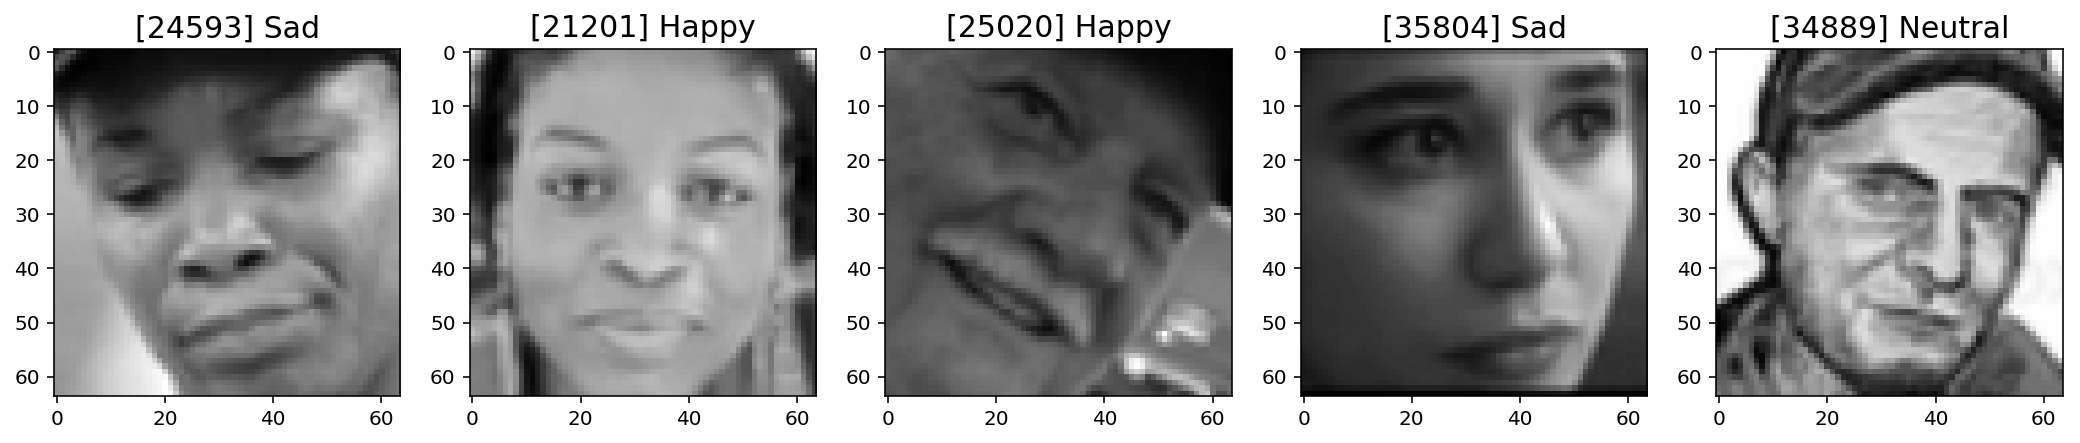

In [4]:
f,axarr = plt.subplots(1,5,figsize=(18,8))
for idx,imgidx in enumerate(np.random.randint(X.shape[0],size=5)):
    currimg=np.reshape(X[imgidx,:],rszshape)
    currlabel=labels[np.argmax(Y[imgidx,:])]
    axarr[idx].imshow(currimg,cmap=plt.get_cmap('gray'))
    axarr[idx].set_title('[%d] %s'%(imgidx,currlabel),fontsize=15)

## Save Loaded Images

In [6]:
savepath = '../data/'+datasetname+'.npz'
np.savez(savepath,X=X,Y=Y,rszshape=rszshape,labels=labels,
         trainimg=trainimg,trainlabel=trainlabel,testimg=testimg,testlabel=testlabel,
         valimg=valimg,vallabel=vallabel,imgcnt=imgcnt)
print ("[%s] Saved."%(savepath))
print('Size is [%.1f]MB'%(os.path.getsize(savepath)/1000./1000.)) 

[../data/face_emotion.npz] Saved.
Size is [2355.8]MB
